In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score, confusion_matrix
import numpy as np

C:\Users\rgupta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_csv("Book1.txt", sep="\t", names=["sentiment","lematize"])
df.head(5)

,sentiment,lematize
0,0,rt unhappy refrain doodle thank wowaka express...
1,0,fucking cannot stress enough love
2,0,big l shyheim furious anger via
3,0,rt level spite anger lurks someone heart level...
4,0,rt active like couple week exam done school


In [5]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents="ascii", stop_words=stopset)

In [6]:
y = df.sentiment

In [7]:
X = vectorizer.fit_transform(df.lematize)

In [8]:
print(y.shape)
print(X.shape)

(6057,)
(6057, 13127)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
clf.score(X_test, y_test)

0.7787866281469253

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.7787866281469253


In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 593,  478],
       [  58, 1294]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.55      0.69      1071
          1       0.73      0.96      0.83      1352

avg / total       0.81      0.78      0.77      2423



In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [32]:
precision

array([0.55798597, 0.73024831, 1.        ])

In [33]:
recall

array([1.        , 0.95710059, 0.        ])

In [34]:
thresholds

array([0, 1], dtype=int64)

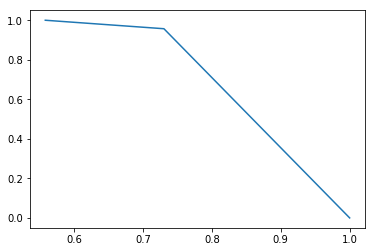

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(precision, recall)